In [ ]:
#EXERCISE 
# You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

#Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
#After removing outliers in step 1, you get a new dataframe.
#On step(2) dataframe, use 4 standard deviation to remove outliers
#Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
#On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

#has code for kaggle installation and api guidelines.

In [10]:
import pandas as pd 
import seaborn as sn 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets/bhp.csv")
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
data.shape

(13200, 7)

In [7]:
data.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

(array([1.3198e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 1.20024030e+06, 2.40021360e+06, 3.60018690e+06,
        4.80016020e+06, 6.00013350e+06, 7.20010680e+06, 8.40008010e+06,
        9.60005340e+06, 1.08000267e+07, 1.20000000e+07]),
 <BarContainer object of 10 artists>)

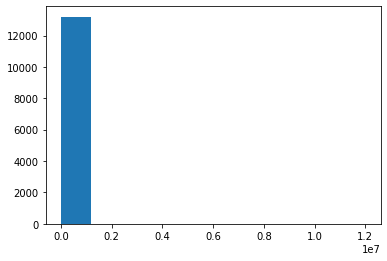

In [12]:
plt.hist(data.price_per_sqft)

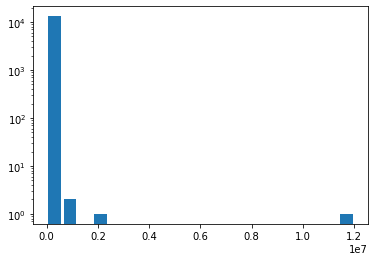

In [14]:
plt.hist(data.price_per_sqft, bins=20, rwidth=0.8)
plt.yscale('log')

In [15]:
#Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

lower_limit , upper_limit = data.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [18]:
outliers = data[(data.price_per_sqft>upper_limit) | (data.price_per_sqft<lower_limit)]
outliers.sample(10)



,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
7575,other,1 BHK,425.0,1.0,750.0,1,176470
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
1005,other,1 BHK,15.0,1.0,30.0,1,200000


In [20]:
#Saving the above in a new data frame 
data_new = data[(data.price_per_sqft<upper_limit) & (data.price_per_sqft>lower_limit)]
data_new.shape

(13172, 7)

In [21]:
data.shape

(13200, 7)

In [23]:
data.shape[0] - data_new.shape[0]
#shows removal of 28 outliers

28

In [24]:
#On step(2) dataframe, use 4 standard deviation to remove outliers
#Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

max_limit = data_new.price_per_sqft.mean() + 4* data_new.price_per_sqft.std()

min_limit = data_new.price_per_sqft.mean() - 4* data_new.price_per_sqft.std()

max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [25]:
data_new[(data_new.price_per_sqft>max_limit) | (data_new.price_per_sqft<min_limit)]
data_new.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1425,other,3 BHK,1240.0,2.0,46.00,3,3709
5405,Kengeri Satellite Town,4 Bedroom,1200.0,3.0,110.00,4,9166
11801,Sarjapur Road,2 BHK,1025.0,2.0,45.50,2,4439
1995,other,3 BHK,2045.0,4.0,154.00,3,7530
815,Yelahanka,3 BHK,1705.0,3.0,95.00,3,5571
8418,Raja Rajeshwari Nagar,2 BHK,1140.0,2.0,38.65,2,3390
825,Kanakpura Road,2 BHK,1180.0,2.0,57.00,2,4830
7360,Raja Rajeshwari Nagar,3 BHK,1400.0,2.0,48.00,3,3428
13013,other,4 Bedroom,1200.0,5.0,350.00,4,29166
1273,other,3 BHK,1596.0,3.0,105.00,3,6578


In [30]:
data_new_std = data_new[(data_new.price_per_sqft<max_limit) &(data_new.price_per_sqft>min_limit)]
data_new_std.shape

(13047, 7)

In [31]:
data_new.shape

(13172, 7)

In [36]:
data_new_std.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


(array([1459., 5916., 3103.,  997.,  546.,  379.,  270.,  193.,  127.,
          57.]),
 array([ 1379. ,  3562.5,  5746. ,  7929.5, 10113. , 12296.5, 14480. ,
        16663.5, 18847. , 21030.5, 23214. ]),
 <BarContainer object of 10 artists>)

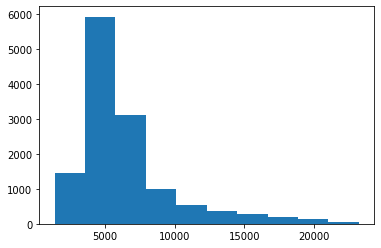

In [38]:
plt.hist(data_new_std.price_per_sqft)

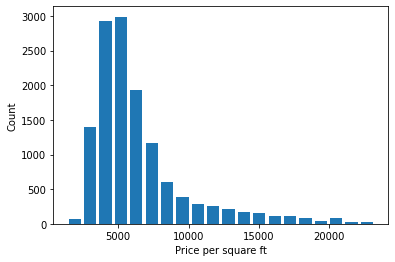

In [40]:
#Plot histogram for new dataframe that is generated after step (3). 
plt.hist(data_new_std.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

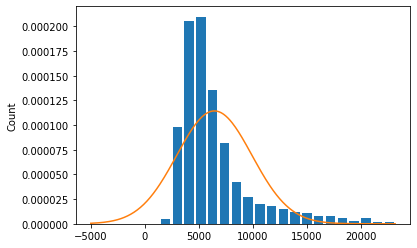

In [49]:
#Also plot bell curve on same histogram
import scipy.stats as sc 
import numpy as np 
plt.hist(data_new_std.price_per_sqft, bins = 20, rwidth=0.8, density = True)
plt.ylabel('Count')

rng = np.arange(-5000, data_new_std.price_per_sqft.max(), 100)
plt.plot(rng, sc.norm.pdf(rng,data_new_std.price_per_sqft.mean(),data_new_std.price_per_sqft.std()))

In [50]:
#On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result.
data_new['zscore'] = (data_new.price_per_sqft-data_new.price_per_sqft.mean())/data_new.price_per_sqft.std()
data_new.sample(10)

/var/folders/2m/c78fd27s08v69jnsf8h09hc00000gn/T/ipykernel_657/3924802612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['zscore'] = (data_new.price_per_sqft-data_new.price_per_sqft.mean())/data_new.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10654,Whitefield,2 BHK,1116.0,2.0,51.91,2,4651,-0.486028
8998,Hulimavu,4 Bedroom,2000.0,4.0,100.00,4,5000,-0.401750
13070,Talaghattapura,3 BHK,2099.0,3.0,134.00,3,6383,-0.067774
641,Hosakerehalli,3 BHK,2378.0,3.0,262.00,3,11017,1.051274
6098,Panathur,3 BHK,1597.0,3.0,67.12,3,4202,-0.594456
13086,Sarjapur Road,3 Bedroom,3500.0,3.0,275.00,3,7857,0.288177
7502,Old Madras Road,3 BHK,1425.0,2.0,74.31,3,5214,-0.350072
12433,Sarjapur Road,3 BHK,1660.0,2.0,116.00,3,6987,0.078084
6930,other,2 BHK,1069.0,2.0,55.00,2,5144,-0.366976
298,Singasandra,2 BHK,1010.0,2.0,29.50,2,2920,-0.904041


In [51]:
outliers_z = data_new[(data_new.zscore < -4) | (data_new.zscore>4)]
outliers_z.shape

(125, 8)

In [52]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5909,other,5 Bedroom,1240.00,5.0,300.0,5,24193,4.233098
8650,HAL 2nd Stage,4 Bedroom,2400.00,4.0,650.0,4,27083,4.930994
1659,Whitefield,5 Bedroom,3250.00,5.0,900.0,5,27692,5.078059
5639,other,3 BHK,2777.29,5.0,650.0,3,23404,4.042565
5315,Banashankari Stage II,4 Bedroom,1500.00,2.0,650.0,4,43333,8.855147


In [54]:
data_new_Z = data_new[(data_new.zscore>-4)&(data_new.zscore<4)]
data_new_Z.shape

(13047, 8)

In [55]:
#In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation
data_new.shape[0] - data_new_Z.shape[0]

125

In [56]:
pip install kaggle


     |████████████████████████████████| 58 kB 1.5 MB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
     |████████████████████████████████| 78 kB 5.6 MB/s 
Using legacy 'setup.py install' for kaggle, since package 'wheel' is not installed.
    Running setup.py install for kaggle ... done
Note: you may need to restart the kernel to use updated packages.


In [64]:
import kaggle
import os
os.environ['KAGGLE_USERNAME'] = 'parmindergrewal07'
os.environ['KAGGLE_KEY'] = '7635e9f4a5fe74946f22ec71f36d41f1'

In [59]:
pip install --user kaggle

Note: you may need to restart the kernel to use updated packages.


In [62]:
import kaggle as kg 

In [65]:
kg.api.authenticate()
kg.api.dataset_download_files(dataset="dgomonov/new-york-city-airbnb-open-data/data", path='gt.zip', unzip=True)

In [66]:
nyc_data = pd.read_csv("gt.zip/AB_NYC_2019.csv")
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [67]:
nyc_data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [68]:
nyc_data.shape

(48895, 16)

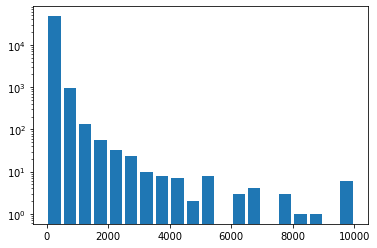

In [74]:
plt.hist(nyc_data.price, bins=20, rwidth=0.8)
plt.yscale('log')

In [75]:
min_threshold = nyc_data.price.quantile([0.01])

In [76]:
max_threshold = nyc_data.price.quantile([0.999])

In [86]:
min_threshold, max_threshold

(0.01    30.0
 Name: price, dtype: float64,
 0.999    3000.0
 Name: price, dtype: float64)

In [89]:
nyc_data[nyc_data.price<min_threshold]

ValueError: Can only compare identically-labeled Series objects

In [91]:
df2 = nyc_data[(nyc_data.price>min_threshold)&(nyc_data.price<max_threshold)]
df2.shape

ValueError: Can only compare identically-labeled Series objects